# **1. Струјање у угловима**

## **1.1 Струјање у четири угла**

У оквиру ове лекције приказаћемо коришћење одговарајућих функција из матплотлиб (енг. matplotlib модула) за визуелизацију струјног поља. На предавањима су за задато поље брзине

$$ u = ax, \qquad v = -ay, \qquad a \in \mathbb{R}^{+}, \quad [a] = T^{-1}$$

детаљно изведени изрази за потенцијал брзине $\varphi(x,y)$ и струјну функцију $\psi(x,y)$. Ми ћемо изабрати да је вредност константе $a$ једнака јединици ($a=1$), па ће изрази за $\varphi(x,y)$ и $\psi(x,y)$ бити

$$\varphi (x,y) = \frac{1}{2} (x^2 - y^2), \qquad \psi(x,y) = xy$$

Сада желимо да прикажемо еквискаларне линије $\boxed{\psi(x,y) = \psi_i = \mathrm{const}}$ - **струјнице** и $\boxed{\varphi(x,y) = \varphi_i = \mathrm{const}}$ - **еквипотенцијалне линије**. Струјнице ћемо приказати црвеном бојом, док ћемо еквипотенцијалне линије приказати црном бојом испрекидано.

Прво ћемо направити два низа користећи нумпај (енг. numpy, [http://numpy.org](http://numpy.org)) и команду линспејс (eнг. linspace). Помоћу те команде се формира низ од $x_{\min}$ до $x_{\max}$ са задатим бројем елемената ($N_x$), тако да је сукцесивно растојање између чланова низа $\Delta x$ дефинисаном изразом

$$ \Delta x = \frac{x_{\max} - x_{\min}}{N_x - 1} $$

У конкретном примеру поделићемо сегмент од -5 до 5 на 200 једнаких делова. Низ има 201 члан, почев од првог елемента -5, закључно са последњим 5. Индекс првог члана низа је, док је индекс последњег члана низа 200. Број елемената низа утиче на резолуцију добијених контура и приказа векторског поља брзине - што је тај број већи резолуција је боља, али и веће коришћење ресурса рачунара (RAM меморије).

Како знамо да ће струјна слика бити симетрична у односу на обе координанте осе, изабраћемо исти опсег и за координату $y$. Командом мешгрид (енг. meshgrid) се креира мрежа прорачунских тачака са паровима координата $(x,y)$. Тих парова координата има $N_x N_y$. Сада се једноставно задају изрази функције $\varphi$ и $\psi$ у функцији координата $X$ и $Y$ (желимо приказ на "meshgrid"-у). 

На крају, приказаћемо струјнице црвеном бојом, а еквипотенцијалне линије црном бојом и испрекиданим линијама.

Text(0, 0.5, '$y$')

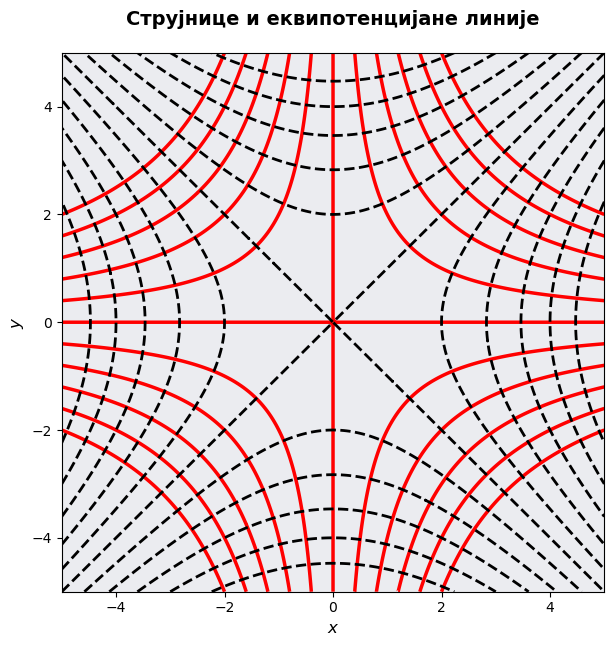

In [77]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['axes.facecolor'] = '#EBECF0' # светло сива позадина дијаграма

Nx = 201
Ny = 201
x = np.linspace(-5, 5, Nx)
y = np.linspace(-5, 5, Ny)


X,Y = np.meshgrid(x,y)

phi = 0.5*(X**2 - Y**2)
psi = X*Y
psi_i = np.linspace(-10, 10, 11)
phi_i = np.linspace(-10, 10, 11)


plt.figure(figsize=(7, 7), dpi=100)
strujnice = plt.contour(X,Y, psi, levels = psi_i, linewidths=2.5, colors='red', linestyles='solid')
ekvipotencijalne_linije = plt.contour(X,Y, phi, levels = phi_i, linewidths=2, linestyles='dashed', colors='black')
plt.title("Струјнице и еквипотенцијане линије", fontsize=14, pad = 20, weight='bold')
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

Векторско поље брзине ћемо приказати коришћем функције стримплот (енг. streamplot) из модула матплотлиб (енг. matplotlib). Користићемо исту резолуцију раванске мреже $(Nx \times Ny = 201\times201)$. Такође, на истом дијаграму ћемо додати и струјницу на којој је вредност струјне функције једнака нулу ($\psi = 0$).

Text(0, 0.5, '$y$')

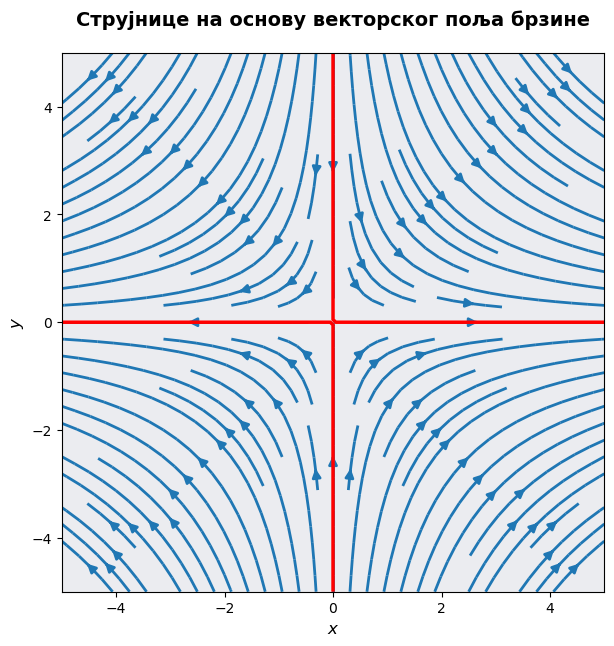

In [78]:
u = X
v = -Y
plt.figure(figsize=(7,7), dpi=100)
plt.title("Струјнице на основу векторског поља брзине", fontsize=14, pad = 20, weight='bold')
strujna_slika = plt.streamplot(X, Y, u, v, density=[1.1], linewidth=2, arrowsize = 1.25)
nulta_strujnica = plt.contour(X,Y, psi, levels=[0], linewidths=2.5, colors='red', linestyles='solid')
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

Расподела притиска у теорији потенцијалних струјања се одређује из Бернулијеве једначине

$$p + \rho \frac{U^2}{2} = \mathrm{const} \qquad \Rightarrow \qquad p + \rho \frac{U^2}{2} = p_{\infty} + \rho \frac{U_{\infty}^2}{2}$$

где су $p_{\infty}$ и $U_{\infty}$ притисак и брзина далеко од опструјаваног тела. У овом случају једна од координатних оса може представљати непропусну чврсту контуру (зид), па се овим струјањем може описати удар вертикалног млаза у хоризонталног зида. Ради лакшег представљања поља притиска, погодно је увести коефицијент притиска $C_p$ који се дефинише на следећи начин:

$$\qquad p - p_{\infty} = \rho\frac{U_{\infty}^2}{2} \left( 1 - \frac{U^2}{U_{\infty}^2}\right) \qquad \Rightarrow \qquad C_p \equiv \frac{p-p_{\infty}}{\frac{1}{2}\rho U_{\infty}^2} \qquad \boxed{C_p = 1 - \frac{U^2}{U_{\infty}^2}}$$ 

У овом струјном пољу брзина тежи бесконачности када $(x,y) \to \infty$, па ћемо стога изабрати да је $U_{\infty} = 5\,\mathrm{m/s}$, што оквирно одговара вредности интензитета брзине на границама разматраног домена. На основу његове дефиниције, максимална вредност коефицијента притиска је једнака јединици и та тачка у струјном пољу представља **зауставну тачку** (тачка у којој је брзина једнака нули, а притисак има максималну вредност). У разматраном проблему, то је координатни почетак.

(0.0, 5.0)

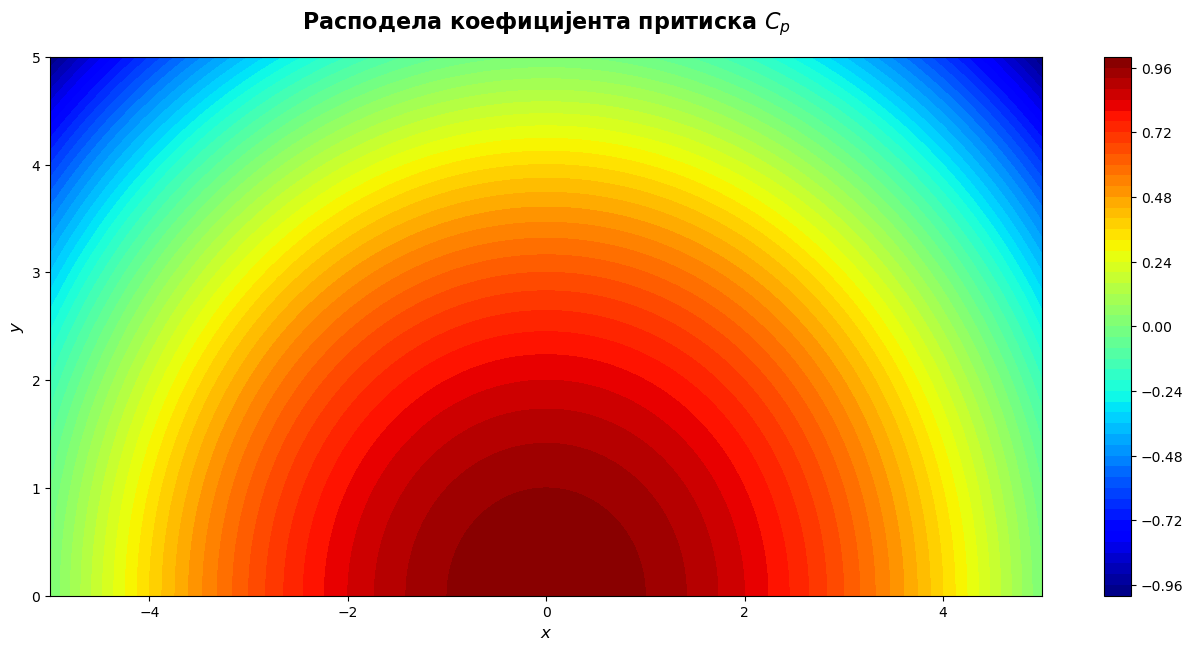

In [81]:
Uinf = 5 
Usqr = u**2 + v**2 ## Интензитет брзине на квадрат

Cp = 1 - Usqr/Uinf**2

plt.figure(figsize=(16,7), dpi=100)
plt.title("Расподела коефицијента притиска $C_p$", fontsize=16, pad = 20, weight='bold')
plt.contourf(X,Y, Cp, levels=64, cmap='jet')
cbar = plt.colorbar(orientation='vertical')
cbar.ax.tick_params(labelsize=10)
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", fontsize=12)
plt.ylim([0,5])

Дакле, линије константног коефијента притиска су концентричне кружнице, са центром у координатном почетку! То следи из замене израза за пројекције брзине

$$C_p = 1 - \frac{u^2 + v^2}{U_{\infty}}^2 = 1 - \frac{x^2 + y^2}{U_\infty^2} \qquad \Rightarrow \qquad x^2  + y^2 = U_{\infty}^2(1 - C_p)$$




## **1.2 Струјање у $\boldsymbol{2n}$ углова**

Комплексни потенцијал струјања у $2n$ углова је одређен изразом:

$ \qquad w(z) = C z^n$

где је $C$ константа из скупа комплексних бројева. Та константа суштински само одређује угао ротације струјне слике око осе која садржи координатни почетак и управна је на раван цртежa  - види дискусију на [https://elearning.rcub.bg.ac.rs/moodle/mod/forum/discuss.php?d=8693](https://elearning.rcub.bg.ac.rs/moodle/mod/forum/discuss.php?d=8693). Разматраћемо управо случај чије је детаљно решење дато у оквиру те дискусије - струјање у 6 углова, чији је комплексни потенцијал одређен изразом

$ \qquad w(z) = z^3$

Дакле, вредност константе $C=1$, али ћемо њу дефинисати као промењиву у програму, да би смо касније могли да мењамо њену вредност.

Text(0, 0.5, '$y$')

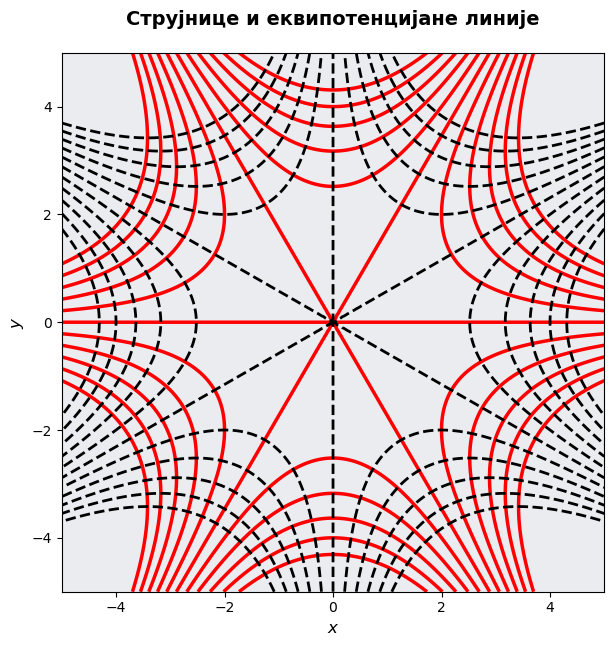

In [82]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['axes.facecolor'] = '#EBECF0' # светло сива позадина дијаграма

Nx = 201
Ny = 201
x = np.linspace(-5, 5, Nx)
y = np.linspace(-5, 5, Ny)
X,Y = np.meshgrid(x,y)

C = 1

z = X + 1j*Y
wz = C*z**3
phi= wz.real
psi = wz.imag

psi_i = np.linspace(-80, 80, 11)
phi_i = np.linspace(-80, 80, 11)


plt.figure(figsize=(7, 7), dpi=100)
plt.title("Струјнице и еквипотенцијалне линије", fontsize=14, pad = 20, weight='bold')
strujnice = plt.contour(X,Y, psi, levels = psi_i, linewidths=2.5, colors='red', linestyles='solid')
ekvipotencijalne_linije = plt.contour(X,Y, phi, levels = phi_i, linewidths=2, linestyles='dashed', colors='black')
plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y$", fontsize=12)

Ако желимо струјну слику да заротирамо за угао од $30^{\circ} \equiv \pi/6$ вредност константе $C = -i$, односно у блоку (ћелији) програмског кода треба написати C = -1j. Докажите ово и пробајте сами!

Струјна слика са струјницом на којој је $\psi=0$ (приказана црвеном бојом) је дата у следећем блоку програмског кода.

Text(0, 0.5, '$y$')

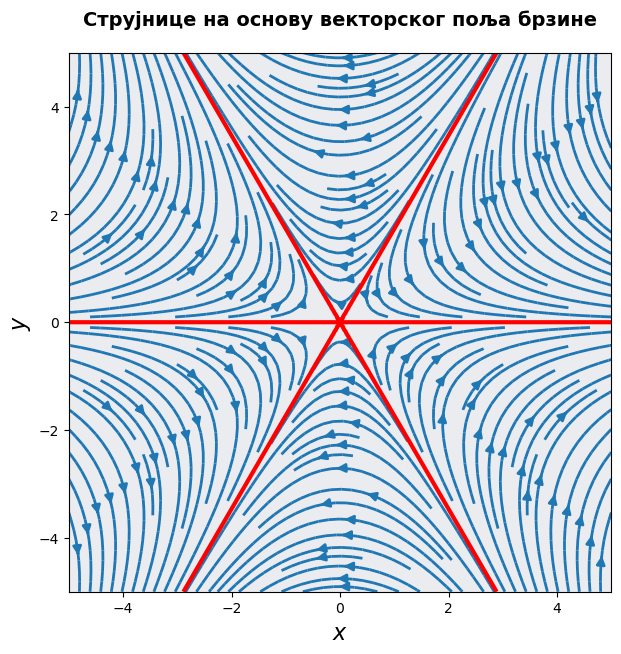

In [84]:
U = 3*z**2
u = U.real
v = -U.imag

plt.figure(figsize=(7,7), dpi=100)
plt.title("Струјнице на основу векторског поља брзине", fontsize=14, pad = 20, weight='bold')
plt.streamplot(X, Y, u, v, density=[1.75], linewidth=2, arrowsize = 1.25)
plt.contour(X,Y, psi, levels=[0], colors='red', linewidths=3, linestyles='solid')
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$y$", fontsize=16)